In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(df.info())
print("\nClass distribution:")
print(df['target'].value_counts())

X = df.drop('target', axis=1)
y = df['target']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1 Score': f1_score(y_test, y_pred_test)
    }
    
    return metrics

Logistic Regression evaluation:
Train Accuracy    0.989011
Test Accuracy     0.982456
Precision         0.986111
Recall            0.986111
F1 Score          0.986111
dtype: float64


Decision Tree evaluation:
Train Accuracy    1.000000
Test Accuracy     0.912281
Precision         0.955882
Recall            0.902778
F1 Score          0.928571
dtype: float64


Random Forest evaluation:
Train Accuracy    1.000000
Test Accuracy     0.956140
Precision         0.958904
Recall            0.972222
F1 Score          0.965517
dtype: float64


SVM evaluation:
Train Accuracy    0.982418
Test Accuracy     0.982456
Precision         0.986111
Recall            0.986111
F1 Score          0.986111
dtype: float64


KNN evaluation:
Train Accuracy    0.973626
Test Accuracy     0.956140
Precision         0.958904
Recall            0.972222
F1 Score          0.965517
dtype: float64


Gradient Boosting evaluation:
Train Accuracy    1.000000
Test Accuracy     0.956140
Precision         0.946667
Recall       

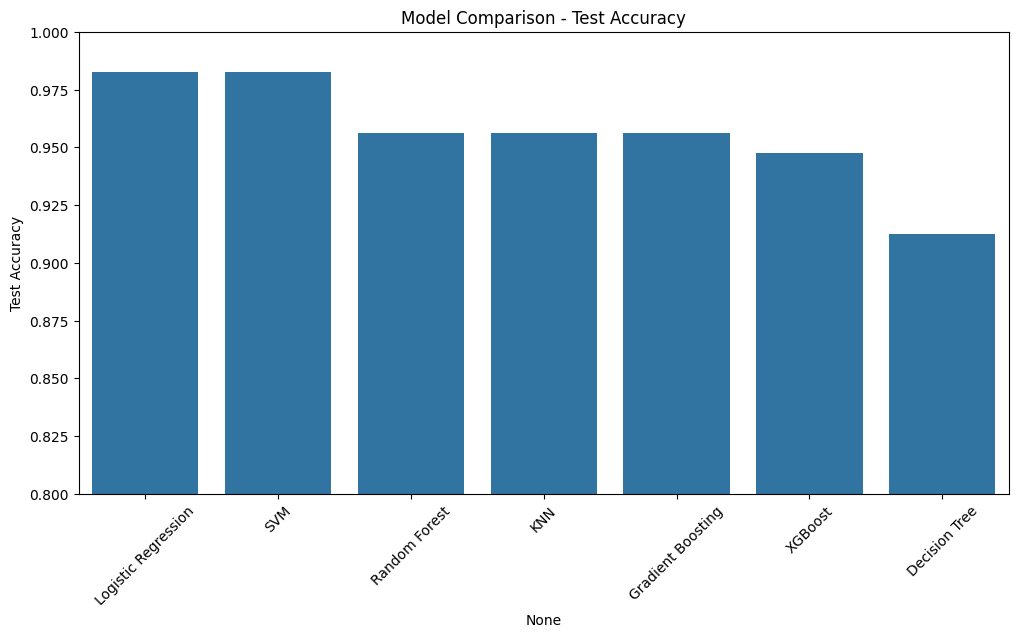

In [ ]:
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    print(f"{name} evaluation:")
    print(pd.Series(results[name]))
    print("\n" + "="*50 + "\n")

results_df = pd.DataFrame(results).T
results_df.sort_values(by='Test Accuracy', ascending=False, inplace=True)
results_df

plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df['Test Accuracy'])
plt.title('Model Comparison - Test Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.show()

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best accuracy score:", grid_search_rf.best_score_)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
print("\nTest set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy score: 0.9604395604395606

Test set performance:
Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
param_dist_rf = {
    'n_estimators': randint(50, 300),
    'max_depth': [None] + list(np.arange(5, 50, 5)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(rf, param_dist_rf, n_iter=50, cv=5, 
                                    scoring='accuracy', random_state=42, n_jobs=-1)
random_search_rf.fit(X_train_scaled, y_train)

print("Best parameters for Random Forest (Randomized):", random_search_rf.best_params_)
print("Best accuracy score:", random_search_rf.best_score_)

best_rf_random = random_search_rf.best_estimator_
y_pred_rf_random = best_rf_random.predict(X_test_scaled)
print("\nTest set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_random))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_random))


Best parameters for Random Forest (Randomized): {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 101}
Best accuracy score: 0.964835164835165

Test set performance:
Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

svm = SVC(random_state=42, probability=True)
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train_scaled, y_train)

print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best accuracy score:", grid_search_svm.best_score_)

best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)
print("\nTest set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Best parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best accuracy score: 0.9802197802197803

Test set performance:
Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
param_dist_svm = {
    'C': uniform(0.1, 100),
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 1, 50)),
    'kernel': ['linear', 'rbf', 'poly']
}

random_search_svm = RandomizedSearchCV(svm, param_dist_svm, n_iter=50, cv=5, 
                                     scoring='accuracy', random_state=42, n_jobs=-1)
random_search_svm.fit(X_train_scaled, y_train)

print("Best parameters for SVM (Randomized):", random_search_svm.best_params_)
print("Best accuracy score:", random_search_svm.best_score_)

best_svm_random = random_search_svm.best_estimator_
y_pred_svm_random = best_svm_random.predict(X_test_scaled)
print("\nTest set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_random))
print("Classification Report:\n", classification_report(y_test, y_pred_svm_random))

Best parameters for SVM (Randomized): {'C': 79.11755405312056, 'gamma': 0.0014563484775012444, 'kernel': 'rbf'}
Best accuracy score: 0.9780219780219781

Test set performance:
Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(random_state=42, eval_metric='logloss')
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train_scaled, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best accuracy score:", grid_search_xgb.best_score_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)
print("\nTest set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1.0}
Best accuracy score: 0.9758241758241759

Test set performance:
Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
param_dist_xgb = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),  # Range 0.6-1.0
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 1)
}

random_search_xgb = RandomizedSearchCV(xgb, param_dist_xgb, n_iter=50, cv=5, 
                                     scoring='accuracy', random_state=42, n_jobs=-1)
random_search_xgb.fit(X_train_scaled, y_train)

print("Best parameters for XGBoost (Randomized):", random_search_xgb.best_params_)
print("Best accuracy score:", random_search_xgb.best_score_)

best_xgb_random = random_search_xgb.best_estimator_
y_pred_xgb_random = best_xgb_random.predict(X_test_scaled)
print("\nTest set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_random))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb_random))

Best parameters for XGBoost (Randomized): {'colsample_bytree': 0.7988994023569542, 'gamma': 0.30087830981676966, 'learning_rate': 0.09545214831324028, 'max_depth': 3, 'n_estimators': 236, 'subsample': 0.8438257335919588}
Best accuracy score: 0.9780219780219781

Test set performance:
Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



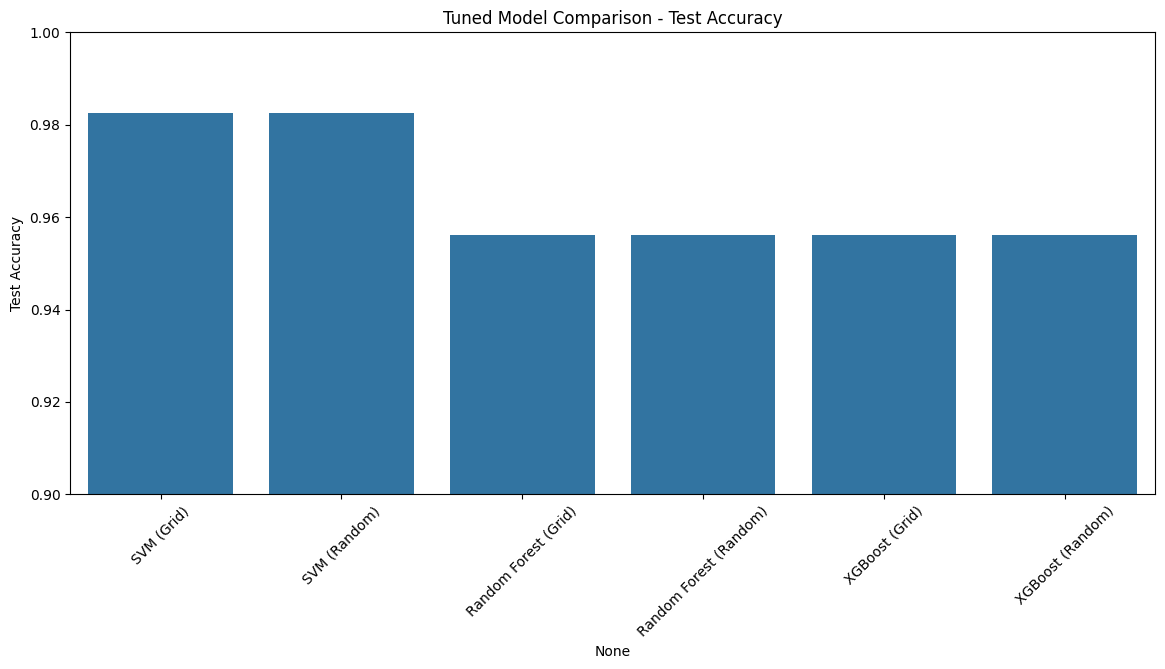

In [ ]:
tuned_models = {
    'Random Forest (Grid)': best_rf,
    'Random Forest (Random)': best_rf_random,
    'SVM (Grid)': best_svm,
    'SVM (Random)': best_svm_random,
    'XGBoost (Grid)': best_xgb,
    'XGBoost (Random)': best_xgb_random
}

tuned_results = {}
for name, model in tuned_models.items():
    tuned_results[name] = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

tuned_results_df = pd.DataFrame(tuned_results).T
tuned_results_df.sort_values(by='Test Accuracy', ascending=False, inplace=True)
tuned_results_df

plt.figure(figsize=(14, 6))
sns.barplot(x=tuned_results_df.index, y=tuned_results_df['Test Accuracy'])
plt.title('Tuned Model Comparison - Test Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.9, 1.0)
plt.show()


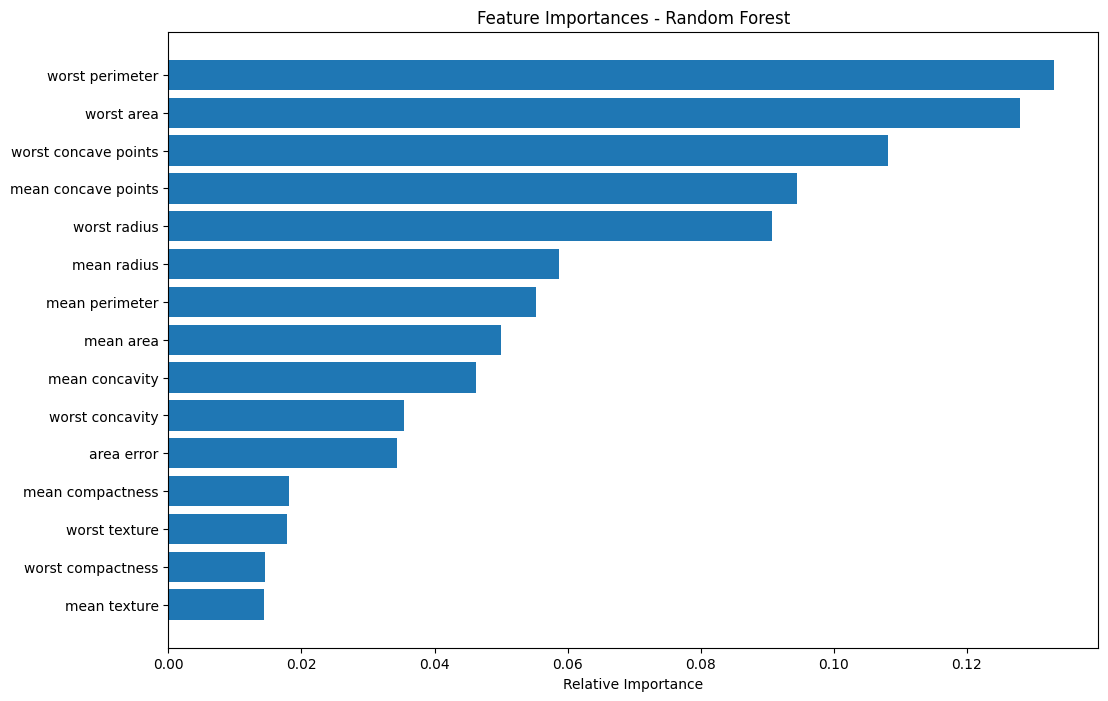

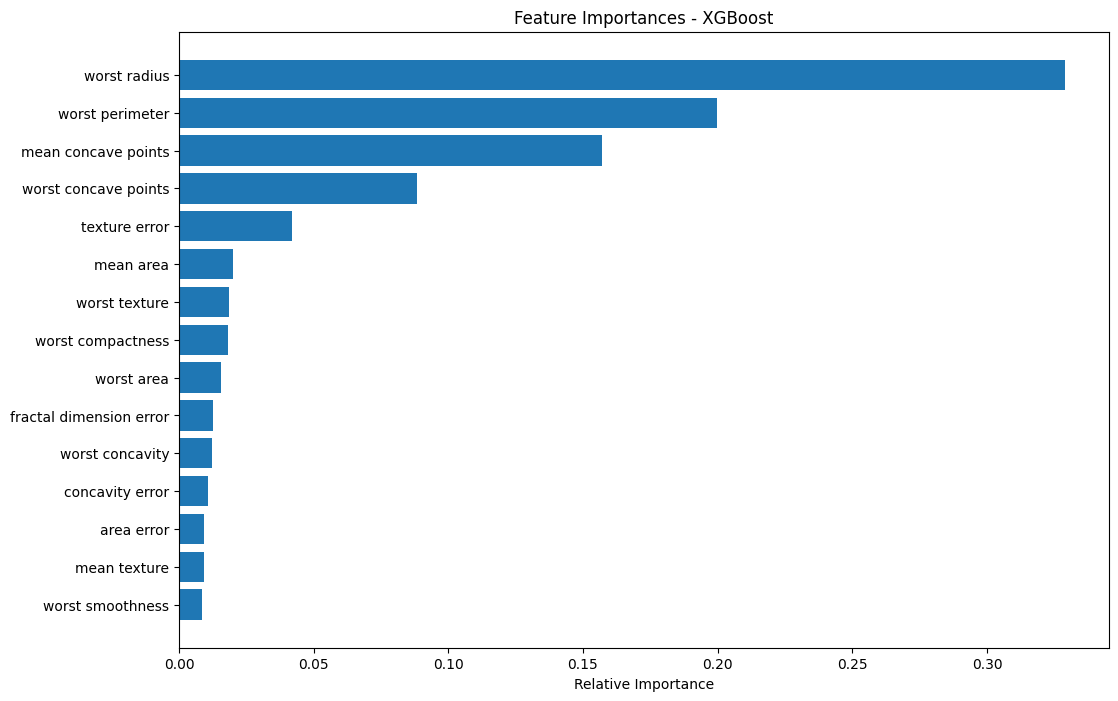

In [ ]:
plt.figure(figsize=(12, 8))
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.title('Feature Importances - Random Forest')
plt.barh(range(15), importances[indices][:15], align='center')
plt.yticks(range(15), [features[i] for i in indices[:15]])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(12, 8))
importances = best_xgb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.title('Feature Importances - XGBoost')
plt.barh(range(15), importances[indices][:15], align='center')
plt.yticks(range(15), [features[i] for i in indices[:15]])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()
plt.show()

Best Model: SVM (Grid)
Test Accuracy: 0.9824561403508771


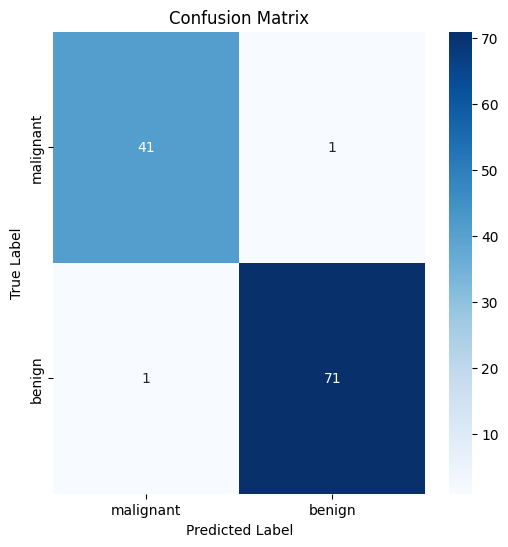

In [ ]:
best_model_name = tuned_results_df.index[0]
best_model = tuned_models[best_model_name]

print(f"Best Model: {best_model_name}")
print("Test Accuracy:", tuned_results_df.loc[best_model_name, 'Test Accuracy'])

y_pred_best = best_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Cross-Validation Scores: [0.93478261 1.         1.         1.         0.93478261 0.97777778
 0.97777778 1.         1.         0.97777778]
Mean CV Accuracy: 0.9802898550724638
Standard Deviation: 0.024704654638196218


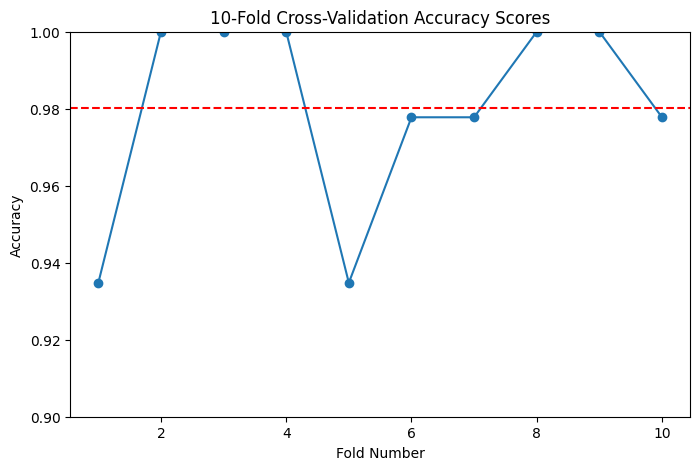

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=data.target_names))

cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=10, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), cv_scores, marker='o')
plt.axhline(np.mean(cv_scores), color='r', linestyle='--')
plt.title('10-Fold Cross-Validation Accuracy Scores')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.show()
